In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [8]:
def read_reference_energies():
    folders = glob.glob('naphtalene/validation-molpro/*/')
    res = []
    for folder in folders:
        this = {}
        
        basename = folder.split('/')[-2]
        this['label'] = basename.split('-')[-1]
        this['nbn'] = int(basename.split('-')[1])
        
        try:
            with open(folder+ 'direct.out') as fh:
                lines = fh.readlines()
            this['energy'] = float(lines[-6].strip().split()[-1])
        except:
            with open(folder+ 'run.log') as fh:
                lines = fh.readlines()
            this['energy'] = float(lines[-7].strip().split()[-1])
        
        res.append(this)
    return pd.DataFrame(res)
df = read_reference_energies()

In [17]:
def read_report(fn):
    with open(fn) as fh:
        lines = fh.readlines()
    
    order = []
    groups = []
    count = 0
    for line in lines:
        if "Found:" in line:
            label = ''.join(line.split('[')[1].split(']')[0].replace(' ', '').split(','))
            label = label.replace('5', 'B').replace('6', 'C').replace('7', 'N')
            order.append(label)
            count += 1
        
        if "Group energy" in line:
            groups.append(count)
            count = 0
    return order, groups[1:]
#read_report('napthalene-molpro.report')

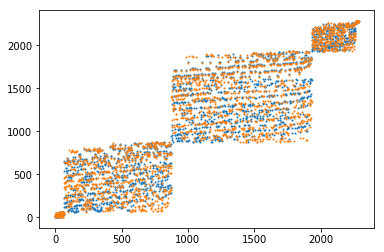

In [34]:
def visualise_report(fn, df):
    report, groups = read_report(fn)
    df = df.sort_values('energy')
    actual = [report.index(_.replace('5', 'B').replace('6', 'C').replace('7', 'N')) for _ in df.label.values]
    
    plt.scatter(range(len(actual)), actual, s=1)
    
#visualise_report('napthalene-molpro-4.5.report', df)
visualise_report('napthalene-molpro-2.report', df)
visualise_report('napthalene-molpro-nobondcount-2.report', df)
#visualise_report('napthalene-molpro-0.1.report', df)
#visualise_report('napthalene-molpro-0.05.report', df)